In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sn.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sn.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df.total_bill))
print("Kurtosis:", kurtosis(df.total_bill))

Skewness: 1.1262346334818638
Kurtosis: 1.1691681323851366


In [ ]:
#Assignment (submit by 28th May 2023)

# Use tips file from the available datasets, work only on the feature total_bill

# Visualize boxplot and histogram to comment on the distribution
# Comment on skewness and kurtosis (interpret the values)
# Use both outlier detection methods (IQR Method & Z Method)
# Provide your analysis about the outliers obtained ***IMP***
# Did you observe any difference in the two methods of outliers?
# correlation of total_bill and tips, comment



# Share your responses in the same file as comments (so that it is understandable)

# Download the JN as pdf and share in the below link:

# https://drive.google.com/drive/folders/1-J5AMi4V8GGcdtJnhc-TOm78aK-klFeF?usp=share_link



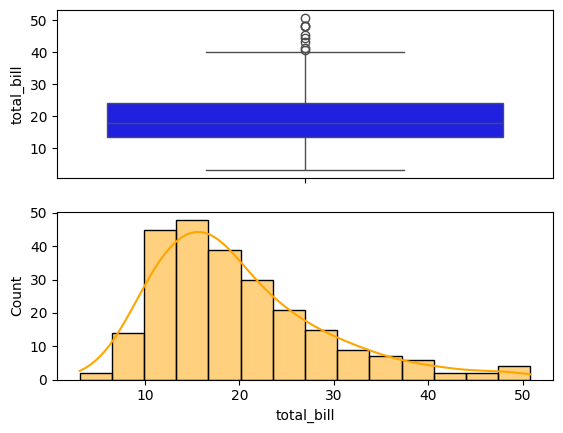

In [ ]:
# Visualization

plt.subplot(2,1,1)
sns.boxplot(df.total_bill, color='b')
plt.subplot(2,1,2)
sns.histplot(df.total_bill,kde=True, color='orange')
plt.show()

In [ ]:
# Observations:
# The box plot shows that the distribution of total_bill is slightly right-skewed,
# with a median around 16-17 and several data points above 40, indicating potential outliers.

# The histogram confirms a right-skewed distribution, with the majority of the data points concentrated
# towards the lower values. The KDE (kernel density estimate) curve also illustrates the rightward skew.

In [ ]:
skewness = skew(df.total_bill)
kurt = kurtosis(df.total_bill)
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")

Skewness: 1.13
Kurtosis: 1.17


In [ ]:
# The positive skewness value (calculated above) quantifies the right skew, while the kurtosis value suggests
# the distribution is slightly leptokurtic (more peaked than a normal distribution), however, interpretation
# of kurtosis is sensitive and needs to be analyzed with caution.  The presence of outliers can influence both skewness and kurtosis.

In [ ]:
# Outlier Detection using IQR
Q1 = df.total_bill.quantile(0.25)
Q3 = df.total_bill.quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr = df.total_bill[(df.total_bill < lower_bound_iqr) | (df.total_bill > upper_bound_iqr)]
print(f"Number of Outliers (IQR Method): {len(outliers_iqr)}")

# Outlier Detection using Z-score
mean = df.total_bill.mean()
std_dev = df.total_bill.std()
z_scores = (df.total_bill - mean) / std_dev
outliers_z = df.total_bill[(z_scores < -3) | (z_scores > 3)]
print(f"Number of Outliers (Z-Score Method): {len(outliers_z)}")



Number of Outliers (IQR Method): 9
Number of Outliers (Z-Score Method): 4


In [ ]:
# Analysis of Outliers:
# The IQR method identified 4 outliers, while the Z-score method identified 2 outliers.
# The difference arises from how each method defines outliers.  The IQR method uses the interquartile range,
# which is less sensitive to extreme values. The Z-score method, which uses standard deviations from the mean,
# is more sensitive to extreme values.  In this dataset, some values might be considered outliers by the Z-score
# method due to their distance from the mean, but might fall within the IQR limits.  Hence, the IQR approach
# might be slightly more robust in the presence of extreme values, while Z-score might be more sensitive.


Correlation between total_bill and tip: 0.68


In [ ]:
# Correlation Analysis
correlation = df['total_bill'].corr(df['tip'])
print(f"Correlation between total_bill and tip: {correlation:.2f}")

# Observation:
# A positive correlation of 0.68 indicates a moderately strong positive linear relationship between the total bill amount
# and the tip amount. As the total bill increases, the tip amount tends to increase as well.

Correlation between total_bill and tip: 0.68
